In [38]:
!pip install pennylane matplotlib

In [39]:
import pennylane as qml
from pennylane import numpy as np

# 2 sites XXZ spin-1/2 chain (PBC)

coeffs_X = -0.5*np.ones(3)
coeffs_Z = np.ones(3)
coeffs = np.concatenate([coeffs_X, coeffs_Z])

ops = [qml.PauliX(0) @ qml.PauliX(1), qml.PauliX(1) @ qml.PauliX(2), qml.PauliX(2) @ qml.PauliX(0),
    qml.PauliZ(0) @ qml.PauliZ(1), qml.PauliZ(1) @ qml.PauliZ(2), qml.PauliZ(2) @ qml.PauliZ(0)]

H_XXZ = qml.Hamiltonian(coeffs, ops)
# H_XXZ = np.matrix(qml.matrix(H_XXZ))
print(qml.matrix(H_XXZ))

[[ 3. +0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j -0.5+0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j -1. +0.j -0.5+0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]
 [ 0. +0.j -0.5+0.j -1. +0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -1. +0.j  0. +0.j -0.5+0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j -0.5+0.j  0. +0.j -1. +0.j  0. +0.j  0. +0.j -0.5+0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j -1. +0.j -0.5+0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j -0.5+0.j -1. +0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j -0.5+0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j  3. +0.j]]


In [40]:
# 4 sites TIM spin-1/2 chain (PBC)
# J = 0.5 and h = 0.1

coeffs_ZZ = -0.5*np.ones(4)
coeffs_X = -0.1*np.ones(4)
coeffs = np.concatenate([coeffs_ZZ, coeffs_X])

ops = [qml.PauliZ(0) @ qml.PauliZ(1), qml.PauliZ(1) @ qml.PauliZ(2), qml.PauliZ(2) @ qml.PauliZ(3), qml.PauliZ(3) @ qml.PauliZ(0),
    qml.PauliX(0), qml.PauliX(1), qml.PauliX(2), qml.PauliX(3)]

H_TIM = qml.Hamiltonian(coeffs, ops)
# H_XXZ = np.matrix(qml.matrix(H_XXZ))
print(qml.matrix(H_TIM))

[[-2. +0.j -0.1+0.j -0.1+0.j  0. +0.j -0.1+0.j  0. +0.j  0. +0.j  0. +0.j
  -0.1+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-0.1+0.j  0. +0.j  0. +0.j -0.1+0.j  0. +0.j -0.1+0.j  0. +0.j  0. +0.j
   0. +0.j -0.1+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-0.1+0.j  0. +0.j  0. +0.j -0.1+0.j  0. +0.j  0. +0.j -0.1+0.j  0. +0.j
   0. +0.j  0. +0.j -0.1+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j -0.1+0.j -0.1+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -0.1+0.j
   0. +0.j  0. +0.j  0. +0.j -0.1+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-0.1+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -0.1+0.j -0.1+0.j  0. +0.j
   0. +0.j  0. +0.j  0. +0.j  0. +0.j -0.1+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j -0.1+0.j  0. +0.j  0. +0.j -0.1+0.j  2. +0.j  0. +0.j -0.1+0.j
   0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -0.1+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j -0.1+0.j  0. +0.j -0.1+0.j  0. +0.j  0. +0.j -0.1+0.j
   0. +0.j  0. +0.j  0. +0.j  0.

In [41]:
def qite_zzz_block(phi, dev):
    wires = dev.wires
    n_wires = len(wires)
    desc_pattern = [[i, i+1] for i in range(n_wires-3,-1,-1)]
    qml.broadcast(unitary=qml.CNOT, pattern='chain', wires=wires[:-1])
    qml.CRX(phi, wires=[wires[n_wires-2], wires[n_wires-1]])
    qml.broadcast(unitary=qml.CNOT, pattern=desc_pattern, wires=list(range(n_qubits)))

In [42]:
n_wires = 4
[[i, i+1] for i in range(n_wires-3,-1,-1)]

[[1, 2], [0, 1]]

In [43]:
def qite_block(pauli_string, gamma, dt, dev):
    phi = np.arccos(-2*np.abs(gamma)*dt)

    for i, pauli in enumerate(pauli_string):
      if pauli == 'X':
        qml.Hadamard(i)
      elif pauli == 'Y':
        qml.adjoint(qml.S(i))
        qml.Hadamard(i)

    qite_zzz_block(phi, dev)

    for i, pauli in enumerate(pauli_string):
      if pauli == 'X':
        qml.Hadamard(i)
      elif pauli == 'Y':
        qml.Hadamard(i)
        qml.S(i)

In [44]:
h_decomposition = {'ZZI': 3.0+0.0j, 'IXX': -0.5+0.0j, 'XIX': -0.5+0.0j, 'XXI': -0.5+0.0j}

In [45]:
h_decomposition

{'ZZI': (3+0j), 'IXX': (-0.5+0j), 'XIX': (-0.5+0j), 'XXI': (-0.5+0j)}

In [46]:
# @qml.qnode(dev)
# def qite(h_decomposition, n):
#   for _ in range(n):
#     for pauli_string in h_decomposition:
#       qite_block(pauli_string, h_decomposition[pauli_string], 0.1)
#       qml.measure(3, postselect=0)

#   return qml.expval(H_XXZ)

In [47]:
# for i in range(10):
#   print(qite(h_decomposition, i))

In [48]:
H_TIM.wires

<Wires = [0, 1, 2, 3]>

In [49]:
H_TIM

  (-0.1) [X0]
+ (-0.1) [X1]
+ (-0.1) [X2]
+ (-0.1) [X3]
+ (-0.5) [Z0 Z1]
+ (-0.5) [Z1 Z2]
+ (-0.5) [Z2 Z3]
+ (-0.5) [Z3 Z0]


In [50]:
H_TIM_decomposition = {'XIII': -0.1, 'IXII': -0.1, 'IIXI': -0.1, 'IIIX': -0.1,
                       'ZZII': -0.5, 'IZZI': -0.5, 'IIZZ': -0.5, 'ZIIZ': -0.5}

In [51]:
n_qubits = len(H_TIM.wires)
n_ancilla = 1

print(n_qubits, n_ancilla)
dev = qml.device('default.qubit', wires=list(range(n_qubits+n_ancilla)))

4 1


In [52]:
list(range(n_qubits+n_ancilla))

[0, 1, 2, 3, 4]

In [53]:
@qml.qnode(dev)
def qite_TIM(h_decomposition, n):
  # prepare equal superposition of states
  qml.broadcast(qml.Hadamard, pattern='single', wires=list(range(n_qubits)))
  # perform QITE
  for _ in range(n):
    for pauli_string in h_decomposition:
      qite_block(pauli_string, h_decomposition[pauli_string], 0.1, dev)
      qml.measure(dev.wires[-1], postselect=0)

  return qml.expval(H_TIM)

0.13955674078011485


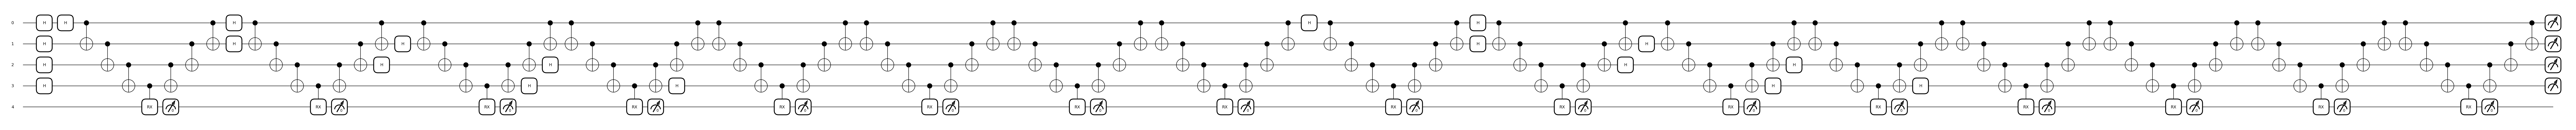

In [56]:
print(qite_TIM(H_TIM_decomposition, 2))
fig, ax = qml.draw_mpl(qite_TIM)(H_TIM_decomposition, 2)
fig.show()